In [1]:
import numpy as np
import cmath
from sympy import*
import matplotlib
import matplotlib.pyplot as plt

findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


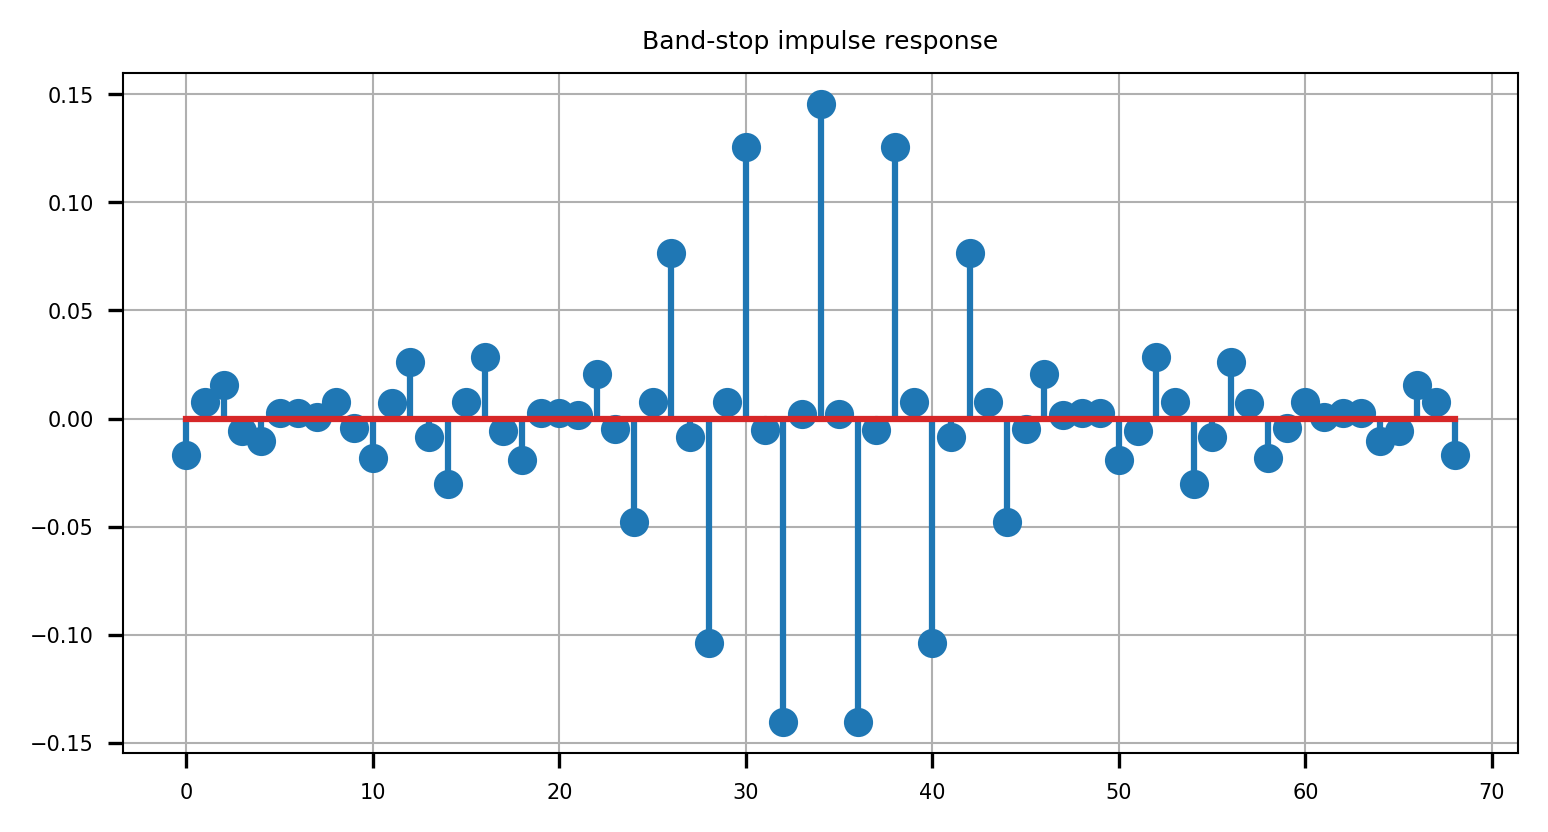

In [2]:
tolerance=0.15
A=-20*np.log10(tolerance)
wp1=np.pi*0.4109
ws1=np.pi*0.4352
ws2=np.pi*0.5564
wp2=np.pi*0.5806

z=symbols('z')
M=68
w1=(wp1+ws1)*0.5   #Lower cutoff of the ideal band-stop filter
w2=(wp2+ws2)*0.5   #Upper cutoff of the ideal band-stop filter
count=0
Hz=Function('Hz')(z)
Hz=0
li=[]
for i in range(M+1):
    if i!=np.round(M/2):
        li.append(1/np.pi/(i-M/2)*(np.sin(w2*(i-M/2))-np.sin(w1*(i-M/2))))
        count=count+1
        Hz=Hz+li[i]*z**(-i)
    else:
        li.append((w2-w1)/np.pi)
        Hz=Hz+li[i]*z**(-i)

x=np.linspace(0,M,M+1)
plt.figure(figsize=(6,3),dpi=300)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
plt.axes().grid(linewidth=0.5)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.stem(x,li)
plt.title('Band-stop impulse response')
plt.savefig('BSI.png',bbox_inches='tight')


findfont: Font family ['Avenir'] not found. Falling back to DejaVu Sans.


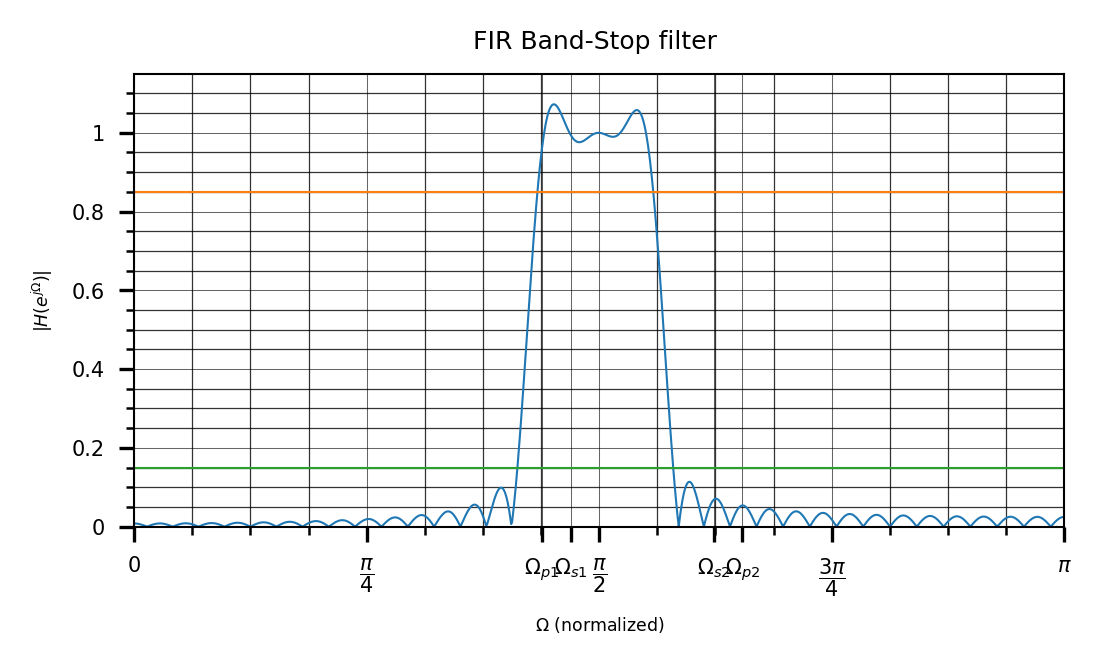

In [3]:
Hz_discrete=Hz.subs(z,exp(I*z))
absz=abs(Hz_discrete)
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absz)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,modH_lambdified(freq_axis),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.ylim(0,1.15)
plt.yticks([0,0.2,0.4,0.6,0.8,1],[0,0.2,0.4,0.6,0.8,1])
plt.plot(freq_axis,np.linspace(0.85,0.85,1000),linewidth=0.5)
plt.plot(freq_axis,np.linspace(0.15,0.15,1000),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('FIR Band-Stop filter ')
plt.savefig('BSFIRM.png',bbox_inches='tight')
plt.show()

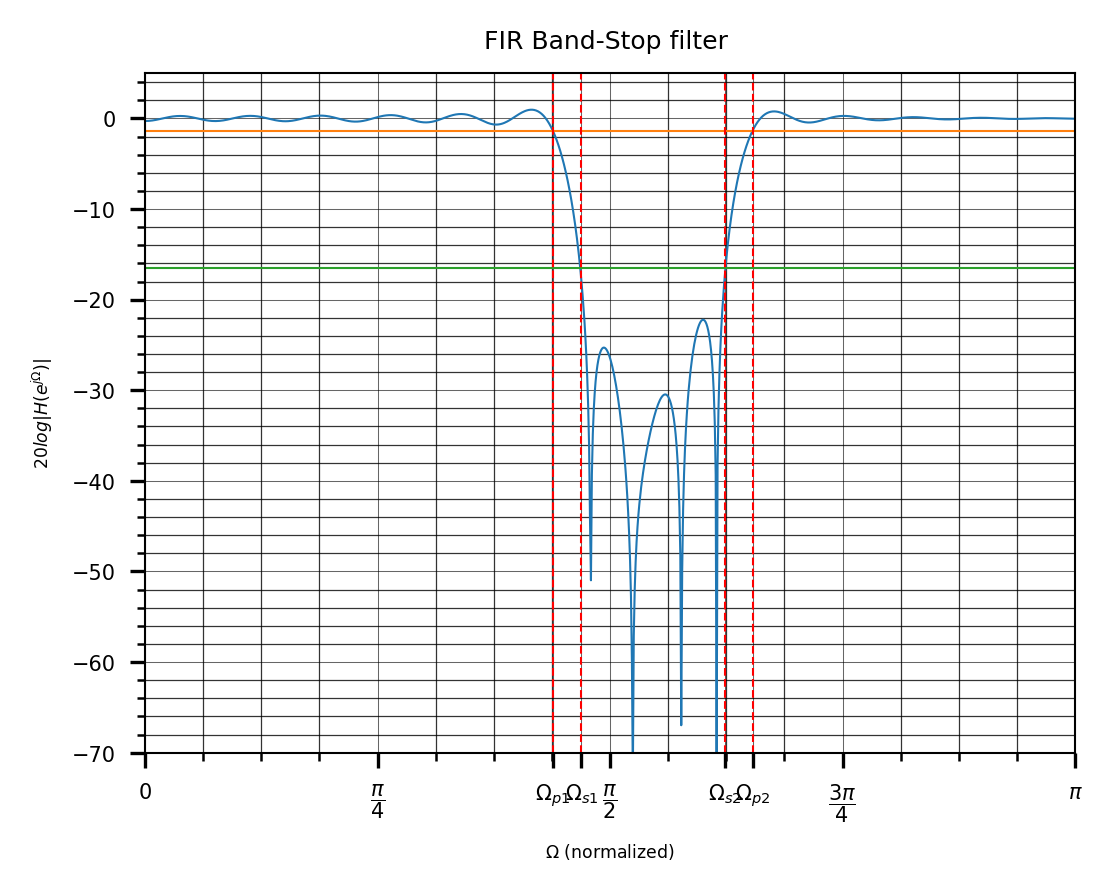

In [18]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
modH_lambdified=lambdify(z,absz)
plt.figure(figsize=(4,3),dpi=300)
plt.plot(freq_axis,20*np.log10(modH_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$20log|H(e^{j\Omega})|$',fontsize='small')
plt.xticks([0, np.pi/4,0.4385*np.pi,0.4692*np.pi,np.pi/2,0.6231*np.pi,0.6538*np.pi,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\Omega_{p1}$',r'$\Omega_{s1}$',r'$\dfrac{\pi}{2}$',r'$\Omega_{s2}$',r'$\Omega_{p2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.ylim(-70,5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.85,0.85,1000)),linewidth=0.5)
plt.plot(freq_axis,20*np.log10(np.linspace(0.15,0.15,1000)),linewidth=0.5)
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
#minor grid lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', alpha=0.8, lw=0.3)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('FIR Band-Stop filter ')
plt.axvline(x=0.4385*np.pi,color='r',ls='--', lw=0.5)
plt.axvline(x=0.4692*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6231*np.pi,color='r',ls='--' ,lw=0.5)
plt.axvline(x=0.6538*np.pi,color='r',ls='--', lw=0.5)
plt.savefig('Band-Stop DB.png',bbox_inches='tight')
plt.show()

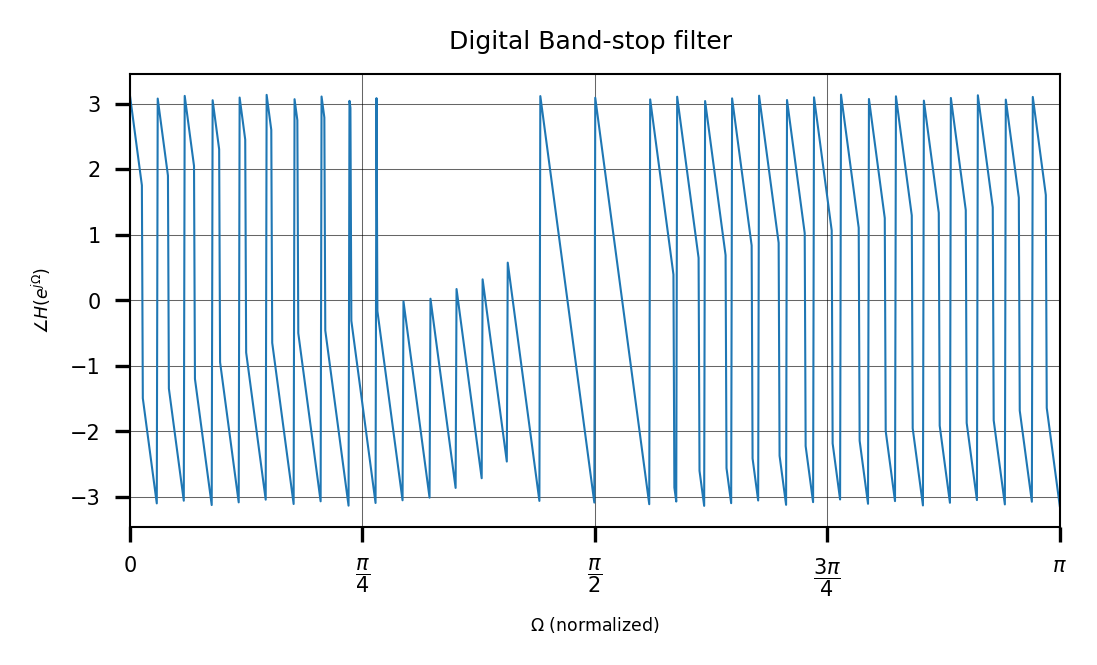

In [4]:
matplotlib.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 5
plt.rcParams['axes.linewidth'] = 0.5
freq_axis=np.linspace(0,np.pi,1000)
H_lambdified=lambdify(z,Hz_discrete)
plt.figure(figsize=(4,2),dpi=300)
plt.plot(freq_axis,np.angle(H_lambdified(freq_axis)),linewidth=0.5)
plt.xlim(0, np.pi)
plt.xlabel(r'$\Omega$ (normalized)',fontsize='small')
plt.ylabel(r'$\angle H(e^{j\Omega})$',fontsize='small')
plt.xticks([0, np.pi/4,np.pi/2,3*np.pi/4,np.pi], [0, r'$\dfrac{\pi}{4}$',r'$\dfrac{\pi}{2}$',r'$\dfrac{3\pi}{4}$',r'$\pi$'])
plt.grid(b=True, which='major', color='black', alpha=0.6, lw=0.25)
matplotlib.rcParams['axes.linewidth'] = 0.1
plt.title('Digital Band-stop filter ')
plt.savefig('Band-stop angle.png',bbox_inches='tight')
plt.show()

In [5]:
for i in range(M+1):
    if(li[i]>0):
        print(i,': ',round(li[i],5))
    else:
        print(i,':',round(li[i],5))

0 : -0.01679
1 :  0.00778
2 :  0.01552
3 : -0.00589
4 : -0.01057
5 :  0.00277
6 :  0.00241
7 :  0.00094
8 :  0.00775
9 : -0.00449
10 : -0.01807
11 :  0.00712
12 :  0.02636
13 : -0.00831
14 : -0.0304
15 :  0.00779
16 :  0.02836
17 : -0.00566
18 : -0.01912
19 :  0.00236
20 :  0.00255
21 :  0.00143
22 :  0.02039
23 : -0.00495
24 : -0.04769
25 :  0.00746
26 :  0.07653
27 : -0.00843
28 : -0.10366
29 :  0.00768
30 :  0.12585
31 : -0.00535
32 : -0.14039
33 :  0.00191
34 :  0.14545
35 :  0.00191
36 : -0.14039
37 : -0.00535
38 :  0.12585
39 :  0.00768
40 : -0.10366
41 : -0.00843
42 :  0.07653
43 :  0.00746
44 : -0.04769
45 : -0.00495
46 :  0.02039
47 :  0.00143
48 :  0.00255
49 :  0.00236
50 : -0.01912
51 : -0.00566
52 :  0.02836
53 :  0.00779
54 : -0.0304
55 : -0.00831
56 :  0.02636
57 :  0.00712
58 : -0.01807
59 : -0.00449
60 :  0.00775
61 :  0.00094
62 :  0.00241
63 :  0.00277
64 : -0.01057
65 : -0.00589
66 :  0.01552
67 :  0.00778
68 : -0.01679
